<a href="https://colab.research.google.com/github/themightyNJ/AdRecommendationSys/blob/master/AdRecommendationSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''Exploratory Data Analysis Libraries'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
'''Internship Survey Dataset'''
dataPath = "https://raw.githubusercontent.com/themightyNJ/AdRecommendationSys/master/survey.json"
surveyData = pd.read_json(dataPath)
surveyData.head()

,Timestamp,Email address,Name,Branch,Year,Hard Skills/Level,Future Interests,If you get an opportunity for internship then which field from the above list will be your priority?
0,2020-07-01 14:05:00,abhijitjha.aj@gmail.com,Abhijit Shekhar Jha,EEE,3rd,"Matlab,Plc -scada,IOT","python_programming, digital_marketing, artific...",Artificial intelligence
1,2020-07-01 14:16:13,vg222000@gmail.com,Vaibhav Gupta,ECE,3rd,"C(intermediate), python (advanced)","machine_learning, android",Python programming
2,2020-07-01 14:19:42,vishwajit1704@gmail.com,Vishwajit Verma,EEE,3rd,"C/C++, PLC SCADA, Arduino,IOT","python_programming, machine_learning, web_deve...","SCADA, IOT, C/C++"
3,2020-07-01 14:57:40,sapra.ritvik@gmail.com,Ritvik Sapra,ECE,3rd,"RPA/basic, python/advanced, R/advanced, ML/adv...","python_programming, machine_learning, artifici...",Blockchain or AI
4,2020-07-01 15:20:42,adityakumar9246@gmail.com,Aditya kumar,MAE,2nd,IC engines for next gen,machine_learning,Machine design


In [0]:
'''Filtering Dataset'''
uselessColumns = ["Timestamp","Branch","Year","Email address"]
surveyData = surveyData.drop(uselessColumns, axis = 1)

In [0]:
surveyData.rename(columns = {'If you get an opportunity for internship then which field from the above list will be your priority?':'Highly Interested'}, inplace = True)

In [14]:
userInterest = surveyData[["Hard Skills/Level","Future Interests","Highly Interested"]]
print(userInterest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 3 columns):
Hard Skills/Level    139 non-null object
Future Interests     139 non-null object
Highly Interested    139 non-null object
dtypes: object(3)
memory usage: 3.4+ KB
None


In [17]:
userInterest.head()

,Hard Skills/Level,Future Interests,Highly Interested
0,"Matlab,Plc -scada,IOT","python_programming, digital_marketing, artific...",Artificial intelligence
1,"C(intermediate), python (advanced)","machine_learning, android",Python programming
2,"C/C++, PLC SCADA, Arduino,IOT","python_programming, machine_learning, web_deve...","SCADA, IOT, C/C++"
3,"RPA/basic, python/advanced, R/advanced, ML/adv...","python_programming, machine_learning, artifici...",Blockchain or AI
4,IC engines for next gen,machine_learning,Machine design


In [0]:
userInterest = userInterest.drop([116])

In [0]:
from sklearn.preprocessing import OrdinalEncoder

In [0]:
enc = OrdinalEncoder()

In [60]:
enc_data = enc.fit_transform(userInterest)
print(enc_data,"\n Dimension : ",enc_data.ndim)

[[ 72.  53.  13.]
 [ 22.  23.  64.]
 [ 45. 102.  69.]
 [103.  63.  17.]
 [ 59.  22.  49.]
 [ 23.  96.  34.]
 [ 27.   2.  13.]
 [ 16.  12.  21.]
 [  1.  89.  13.]
 [ 95.  69.  50.]
 [109.   4.  19.]
 [ 36.  72.  31.]
 [ 71.  43.  50.]
 [ 42.  56.  62.]
 [ 57.  92.  72.]
 [ 76.  22.  47.]
 [ 62.  58.   5.]
 [ 43.  11.   9.]
 [ 90. 123.  43.]
 [ 44.  62.   4.]
 [ 84.  34.  71.]
 [  3. 126.  72.]
 [ 85.   7.   2.]
 [107. 112.  72.]
 [ 86.  82.  59.]
 [114.  73.  85.]
 [114.  71.  77.]
 [ 96.  83.  70.]
 [ 87.  58.  63.]
 [ 20. 109.  65.]
 [ 21.  94.  76.]
 [ 51.  54.  18.]
 [ 12.  67.  59.]
 [ 12.  67.  59.]
 [ 56.  97.  74.]
 [ 61.  10.  39.]
 [ 54.  77.  35.]
 [ 53.   8.  13.]
 [ 63.   0.  13.]
 [ 26.  81.  36.]
 [ 75.  39.  46.]
 [ 66. 124.  13.]
 [ 65. 108.  28.]
 [ 14.  84.  47.]
 [113.   3.  86.]
 [ 96.  79.  55.]
 [ 17.  68.   6.]
 [ 48.   5.  80.]
 [ 35.  37.  13.]
 [ 46.  61.  12.]
 [ 48.  78.  22.]
 [ 73.  57.  64.]
 [ 91.  27.  56.]
 [  9. 120.  26.]
 [ 69.  20.  44.]
 [ 48. 111

In [0]:
hardSkills = enc_data[:,0:1].flatten()
futureInterests = enc_data[:,1:2].flatten()
highlyInterest = enc_data[:,2:3].flatten()

In [0]:
hardSkills_df = pd.Series(hardSkills).to_frame()
futureInterests_df = pd.Series(futureInterests).to_frame()
highlyInterest_df = pd.Series(highlyInterest).to_frame()

In [0]:
enc_df = hardSkills_df.merge(futureInterests_df, left_index=True,right_index=True)

In [0]:
enc_df = enc_df.merge(highlyInterest_df, left_index=True, right_index=True)

In [86]:
enc_df.head()

,0_x,0_y,0
0,72.0,53.0,13.0
1,22.0,23.0,64.0
2,45.0,102.0,69.0
3,103.0,63.0,17.0
4,59.0,22.0,49.0


In [0]:
enc_df.rename(columns = {"0_x":"Hard Skills","0_y":"Future Interests","0":"Highly Interest"}, inplace = True)

In [90]:
enc_df.head()

,Hard Skills,Future Interests,0
0,72.0,53.0,13.0
1,22.0,23.0,64.0
2,45.0,102.0,69.0
3,103.0,63.0,17.0
4,59.0,22.0,49.0


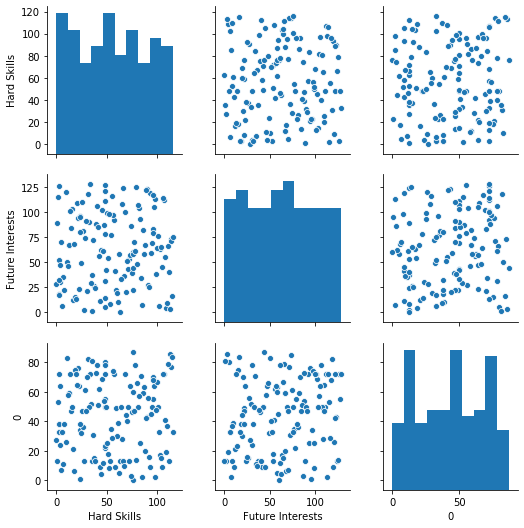

In [93]:
sns.pairplot(enc_df)
plt.show()

In [0]:
from sklearn.cluster import KMeans

In [96]:
#Elbow Method to find optimum number of k
lis  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=5)
    kmeans.fit(enc_df)
    lis.append(kmeans.inertia_)
lis

[429367.2608695652,
 289967.0103006096,
 205559.57404758944,
 169154.01123498898,
 144856.7355283292,
 128405.04330607133,
 110761.68674648578,
 98271.659561634,
 90009.871192185,
 81068.35483405483]

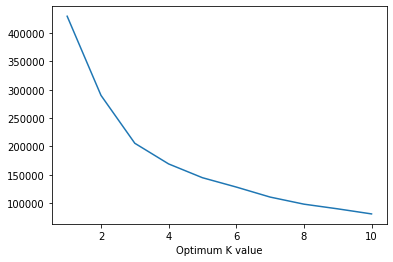

In [97]:
#Select the value on x-axis for k
plt.xlabel("Optimum K value")
plt.plot(range(1,11),lis)
plt.show()

In [0]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=5)

In [0]:
model = kmeans.fit(enc_df)

In [0]:
test_data = [22, 23, 64]
test_data = np.array(test_data).reshape(1,-1)

In [107]:
model.predict(test_data)

array([2], dtype=int32)